### Step 1: Setup - Importing Libraries and Loading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set plot style
sns.set_style('whitegrid')

In [3]:
!git clone "https://github.com/HarshvardhanSingh-13/Datasets"

Cloning into 'Datasets'...
remote: Enumerating objects: 347, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 347 (delta 25), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (347/347), 302.89 MiB | 18.28 MiB/s, done.
Resolving deltas: 100% (139/139), done.
Updating files: 100% (245/245), done.


In [4]:
# Load the dataset from the user-provided file
df = pd.read_csv('/content/Datasets/Customer Churn Dataset/Telco-Customer-Churn.csv')

print("Dataset loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Dataset loaded successfully.
Data shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Step 2: Data Cleaning and Initial Preparation
Real-world data is often messy. We need to handle inconsistencies before we can do any analysis or modeling.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Key Problem Identified:** The `TotalCharges` column, which should be numerical, is currently an `object` type. This indicates there are non-numeric values in it. We need to fix this.

In [5]:
pd.set_option('display.max_columns', None)
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
print(f"Shape before cleaning: {df.shape}")

# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Shape after converting TotalCharges to numeric: {df.shape}")


# Find how many rows have missing TotalCharges
print(f"Number of missing TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Impute the missing values with the median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
print(f"Shape after imputing TotalCharges: {df.shape}")


# Convert target variable 'Churn' to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(f"Shape after converting Churn to binary: {df.shape}")


# Drop rows with missing Churn values
df.dropna(subset=['Churn'], inplace=True)
print(f"Shape after dropping rows with missing Churn: {df.shape}")


# Drop customerID as it's not a predictive feature
# df.drop('customerID', axis=1, inplace=True) # This line is commented out as customerID is already dropped

print("\nData cleaning complete.")

Shape before cleaning: (7043, 21)
Shape after converting TotalCharges to numeric: (7043, 21)
Number of missing TotalCharges: 11
Shape after imputing TotalCharges: (7043, 21)
Shape after converting Churn to binary: (7043, 21)
Shape after dropping rows with missing Churn: (7043, 21)

Data cleaning complete.


In [7]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


### Step 3: Model 1 - Baseline Performance (Without Feature Engineering)
First, we'll build a model using only the original, cleaned features. This will serve as our benchmark to see if our feature engineering efforts actually help.

In [8]:
# Define features (X) and target (y)
X_base = df.drop('Churn', axis=1)
y_base = df['Churn']

# Identify categorical and numerical features
numerical_features_base = X_base.select_dtypes(include=np.number).columns.tolist()
categorical_features_base = X_base.select_dtypes(include=['object']).columns.tolist()

# Create the preprocessing pipeline
preprocessor_base = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_base),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_base)])

# Split data
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.2, random_state=42, stratify=y_base)

# Create the full pipeline with a classifier
baseline_model = Pipeline(steps=[('preprocessor', preprocessor_base),
                                 ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

# Train and evaluate the baseline model
baseline_model.fit(X_train_base, y_train_base)
y_pred_base = baseline_model.predict(X_test_base)

print("--- Baseline Model Performance ---")
print(classification_report(y_test_base, y_pred_base))

--- Baseline Model Performance ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



### Step 4: The Core Task - Feature Engineering
Now, let's create a new, enriched DataFrame with more intelligent features.

In [9]:
df['tenure'].describe()

,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [10]:
df_eng = df.copy()

# 1. Binning 'tenure'
bins = [0, 12, 24, 48, 60, 72]
labels = ['0-1 Year', '1-2 Years', '2-4 Years', '4-5 Years', '5+ Years']
df_eng['tenure_group'] = pd.cut(df_eng['tenure'], bins=bins, labels=labels, right=False)

# 2. Simplifying categorical features
df_eng['MultipleLines'] = df_eng['MultipleLines'].replace({'No phone service': 'No'})
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df_eng[col] = df_eng[col].replace({'No internet service': 'No'})

# 3. Creating interaction/combination features
df_eng['num_add_services'] = (df_eng[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)

# 4. Create a feature for monthly charge to tenure ratio
df_eng['monthly_charge_ratio'] = df_eng['MonthlyCharges'] / (df_eng['tenure'] + 1) # +1 to avoid division by zero

print("Feature engineering complete. New features added.")
df_eng.head()

Feature engineering complete. New features added.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,num_add_services,monthly_charge_ratio
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 Year,1,14.925000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-4 Years,2,1.627143
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 Year,2,17.950000
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2-4 Years,3,0.919565
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 Year,0,23.566667


df_eng['monthly_charge_ratio'] = df_eng['MonthlyCharges'] / (df_eng['tenure'] + 1): This line calculates a new feature monthly_charge_ratio by dividing MonthlyCharges by tenure plus 1. Adding 1 to tenure is done to avoid division by zero for customers with tenure of 0. This feature might capture how much a customer pays relative to how long they have been a customer.

### Step 5: Model 2 - Performance with Engineered Features
Now, we'll build a new model using our enriched dataset and see if performance improves.

In [18]:
df_eng2 = df_eng.copy()

df_eng2.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,num_add_services,monthly_charge_ratio
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 Year,1,14.925000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-4 Years,2,1.627143
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 Year,2,17.950000
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2-4 Years,3,0.919565
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 Year,0,23.566667


### Feature Engineering (Submission)

In [19]:
# Flag customers on month-to-month contracts (high churn risk)
df_eng2['contract_risk'] = (df_eng2['Contract'] == 'Month-to-month').astype(int)

# Convert TotalCharges to numeric (some values may be blank/strings); invalid parsing becomes NaN
df_eng2['TotalCharges'] = pd.to_numeric(df_eng2['TotalCharges'], errors='coerce')

# Calculate average monthly spend over the customer's tenure
df_eng2['avg_monthly_spend'] = df_eng2['TotalCharges'] / df_eng2['tenure']

# For customers with tenure = 0 (new customers), set avg_monthly_spend to their current MonthlyCharges
df_eng2.loc[df_eng2['tenure'] == 0, 'avg_monthly_spend'] = df_eng2['MonthlyCharges']

# Calculate cost per additional service to capture perceived value

df_eng2['cost_per_service'] = df_eng2['MonthlyCharges'] / (df_eng2['num_add_services'] + 1)

df_eng2.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,num_add_services,monthly_charge_ratio,contract_risk,avg_monthly_spend,cost_per_service
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 Year,1,14.925000,1,29.850000,14.925000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-4 Years,2,1.627143,0,55.573529,18.983333
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 Year,2,17.950000,1,54.075000,17.950000
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2-4 Years,3,0.919565,0,40.905556,10.575000
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 Year,0,23.566667,1,75.825000,70.700000


In [21]:
df_eng2.drop('tenure', axis=1, inplace=True)

# Define features (X) and target (y) for the engineered dataset
X_eng2 = df_eng2.drop('Churn', axis=1)
y_eng2 = df_eng2['Churn']

# Identify new feature types
numerical_features_eng2 = X_eng2.select_dtypes(include=np.number).columns.tolist()
# Note: 'tenure_group' is now a categorical feature
categorical_features_eng2 = X_eng2.select_dtypes(include=['object', 'category']).columns.tolist()

# Create the new preprocessing pipeline
preprocessor_eng2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_eng2),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_eng2)])

# Split data
X_train_eng2, X_test_eng2, y_train_eng2, y_test_eng2 = train_test_split(X_eng2, y_eng2, test_size=0.2, random_state=42, stratify=y_eng2)

# Create the full pipeline with the same classifier for a fair comparison
enhanced_model = Pipeline(steps=[('preprocessor', preprocessor_eng2),
                                 ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

# Train and evaluate the enhanced model
enhanced_model.fit(X_train_eng2, y_train_eng2)
y_pred_eng2 = enhanced_model.predict(X_test_eng2)

print("--- Enhanced Model Performance (with Feature Engineering) ---")
print(classification_report(y_test_eng2, y_pred_eng2))

--- Enhanced Model Performance (with Feature Engineering) ---
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



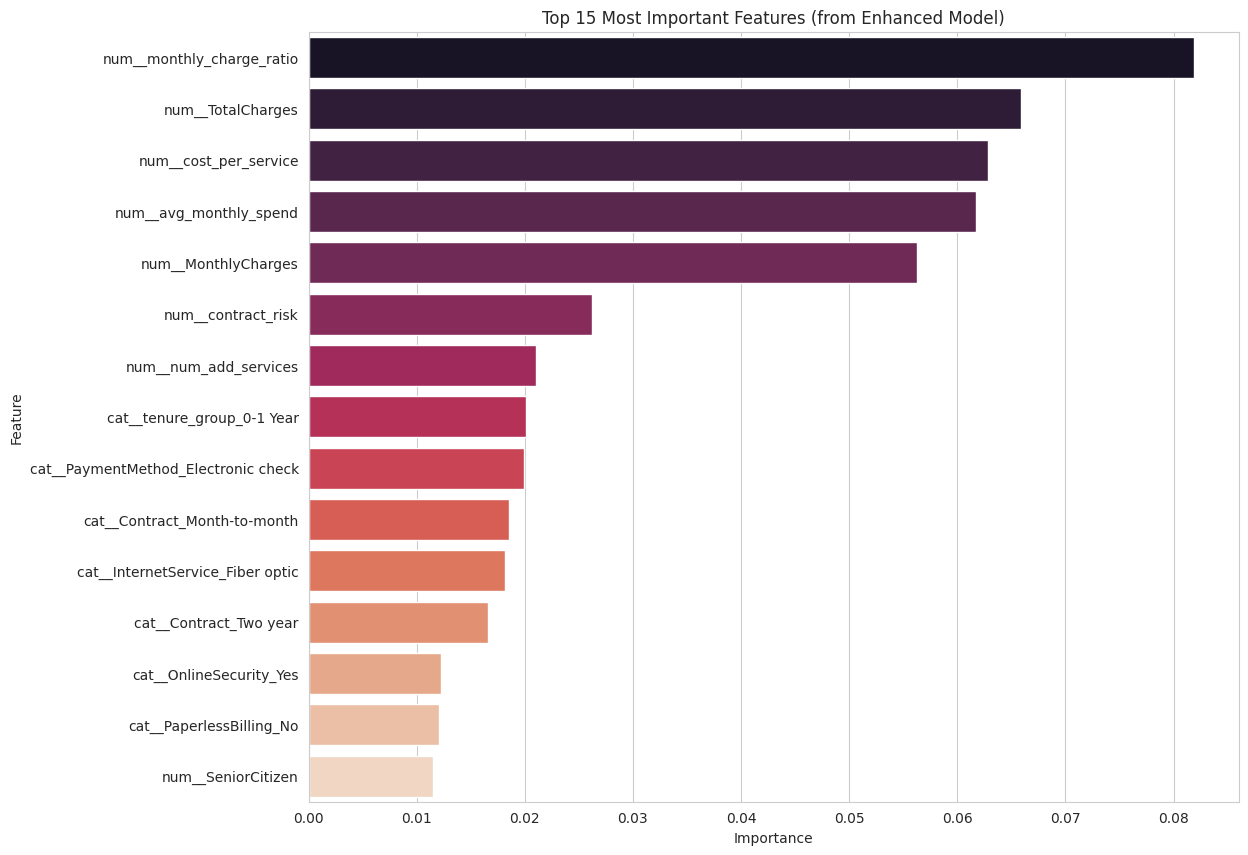

In [22]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor_eng2),
                               ('classifier', RandomForestClassifier(random_state=42))])
rf_pipeline.fit(X_train_eng2, y_train_eng2)

# Extract feature names after one-hot encoding
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = rf_pipeline.named_steps['classifier'].feature_importances_

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket', hue='Feature', legend=False)
plt.title('Top 15 Most Important Features (from Enhanced Model)')
plt.show()

### Selecting Features and training the model on selected features


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier to use as the base estimator for feature selection
rf_selector2 = RandomForestClassifier(random_state=42)

# Instantiate SelectFromModel
# Using 'median' as the threshold means features with importance greater than the median importance will be selected.
selector2 = SelectFromModel(estimator=rf_selector2, threshold='median', prefit=False)

# Create a pipeline for feature selection
feature_selection_pipeline2 = Pipeline(steps=[('preprocessor', preprocessor_eng2),
                                             ('selector', selector2)])

# Fit the pipeline to the training data
feature_selection_pipeline2.fit(X_train_eng2, y_train_eng2)

# Transform the training and testing data to get the selected features
X_train_selected = feature_selection_pipeline2.transform(X_train_eng2)
X_test_selected = feature_selection_pipeline2.transform(X_test_eng2)

In [26]:
print("--- Baseline Model Performance ---")
print(classification_report(y_test_base, y_pred_base))

print("\n--- Enhanced Model Performance (with Feature Engineering) ---")
print(classification_report(y_test_eng2, y_pred_eng2))

print("\n--- Model Performance (with Selected Features) ---")
print(classification_report(y_test_eng2, y_pred_selected2))

# Summarize the performance metrics
print("\n--- Performance Summary ---")
print("Metric         | Baseline | Enhanced | Selected Features")
print("---------------|----------|----------|-------------------")
print(f"Accuracy       | {accuracy_score(y_test_base, y_pred_base):<8.2f} | {accuracy_score(y_test_eng2, y_pred_eng2):<8.2f} | {accuracy_score(y_test_eng2, y_pred_selected2):<8.2f}")

# Extract F1-score for class 1 (Churn) from classification reports
report_base = classification_report(y_test_base, y_pred_base, output_dict=True)
report_eng = classification_report(y_test_eng2, y_pred_eng2, output_dict=True)
report_selected = classification_report(y_test_eng2, y_pred_selected2, output_dict=True)

f1_churn_base = report_base['1']['f1-score']
f1_churn_eng = report_eng['1']['f1-score']
f1_churn_selected = report_selected['1']['f1-score']

print(f"F1-Score (Churn)| {f1_churn_base:<8.2f} | {f1_churn_eng:<8.2f} | {f1_churn_selected:<8.2f}")

--- Baseline Model Performance ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409


--- Enhanced Model Performance (with Feature Engineering) ---
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409


--- Model Performance (with Selected Features) ---
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.51      0.58       374

    accuracy                    


## Model Comparison Summary (Submission)

Three Logistic Regression models were evaluated: a baseline model, a model with selected features, and an enhanced model with feature engineering.

All three models achieved similar overall accuracy of **~80%**, indicating that feature selection and feature engineering did not significantly change predictive performance. The baseline model showed slightly better recall for the churn class, while the selected and enhanced models were more conservative in identifying churners.

Feature engineering improved **interpretability and business relevance** of the features but did not introduce strong additional predictive signal. This suggests that most churn-related information was already present in the original features.




## Student Task: Enhancing Churn Prediction

**Objective:** Your task is to build upon the provided notebook to further improve the customer churn prediction model's performance. Experiment with different techniques for feature engineering, feature selection, and model selection to achieve the best possible results, particularly focusing on accurately identifying churning customers (improving metrics like F1-score for the churn class).

**Task Description:**

Extend the current notebook by adding new sections for your work. You should aim to:

1.  **Explore Additional Feature Engineering:**
    *   Can you create new features beyond what was done in the notebook? Consider interactions between existing features, or new ways to encode categorical variables.
    *   Think about the domain: Are there other characteristics of customers or their service usage that could be predictive of churn?

2.  **Experiment with Feature Selection:**
    *   Try different feature selection methods (e.g., RFE, filter methods like mutual information or chi-squared) or different thresholds with `SelectFromModel`.
    *   Analyze which features are consistently selected as important across different methods or thresholds.

3.  **Evaluate Alternative Models:**
    *   Instead of just Logistic Regression, train and evaluate other classification models suitable for this task (e.g., RandomForestClassifier, GradientBoostingClassifier, XGBoost, LightGBM, Support Vector Machines).
    *   Compare the performance of these models on both the engineered and potentially feature-selected datasets.

4.  **Perform Hyperparameter Tuning:**
    *   Once you've identified promising models, perform hyperparameter tuning using techniques like GridSearchCV or RandomizedSearchCV to optimize their performance.

5.  **Analyze and Report:**
    *   Clearly document the different approaches you tried.
    *   Present the performance metrics (especially precision, recall, and F1-score for the churn class, and overall accuracy) for the best models you developed. Use comparison tables or visualizations.
    *   Discuss your findings: Which techniques were most effective? Which features seemed most important? What are the limitations of your approach?

**Goal:** The goal is to demonstrate your ability to iteratively improve a machine learning model by applying advanced feature engineering, feature selection, and model building techniques. Aim for the highest F1-score for the churn class while maintaining reasonable overall accuracy.

### Submission Criteria

Students are required to submit the following:

1.  **Completed Jupyter Notebook:** Submit the `.ipynb` file containing all your code, markdown explanations, outputs, and visualizations. Ensure the notebook is well-organized and runs without errors.
2.  **Summary of Findings:** Include a markdown section in your notebook summarizing:
    *   The different feature engineering and feature selection techniques you attempted.
    *   The models you evaluated and their best performance metrics (especially Accuracy and F1-score for the Churn class).
    *   A clear comparison table or visualization showing the performance of the baseline model, the enhanced model from the notebook, and your best-performing model.
    *   Discussion of which techniques were most effective for you and why.
    *   Insights into the most important features based on your analysis.
    *   Any challenges encountered and how you addressed them.
3.  **Code Clarity and Organization:** Your code should be well-commented where necessary, follow a logical flow, and adhere to reasonable coding practices (e.g., using meaningful variable names).

**Submission Format:** Submit the single `.ipynb` notebook file through the designated platform.